# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [167]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [168]:
# YOUR CODE HERE
import scipy.stats as stats

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [169]:
# YOUR CODE HERE
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(adultDataSet_filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [170]:
# YOUR CODE HERE
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [171]:
df['label'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,label
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,13
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,13
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,9
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,7
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,13


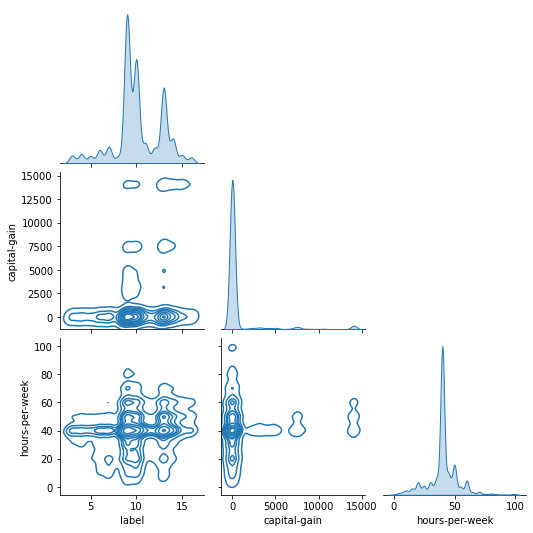

In [172]:
df_sub = df.filter(['label', 'capital-gain', 'hours-per-week'], axis=1)
g = sns.pairplot(df_sub, kind = 'kde', corner=True)

In [173]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)
# Age and hours per week seem to be missing values. It makes sense to replace these with means because they are
# numerical data

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
label                0
dtype: int64


In [174]:
# Creating dummy variables
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()

# Filling missing values
mean_ages=df['age'].mean()
df['age'].fillna(value=mean_ages, inplace=True)

mean_hours = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours, inplace=True)

In [175]:
df['hours-per-week-win'] = stats.mstats.winsorize(df['hours-per-week'], limits=[0.01, 0.01])
df.drop(columns = 'hours-per-week', inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,native-country,income_binary,label,age_na,hours-per-week_na,hours-per-week-win
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,United-States,<=50K,13,False,False,40.0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,United-States,<=50K,13,False,False,13.0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,United-States,<=50K,9,False,False,40.0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,United-States,<=50K,7,False,False,40.0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Cuba,<=50K,13,False,False,40.0


In [176]:
# Checking
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

age                      0
workclass             1836
fnlwgt                   0
education                0
education-num            0
marital-status           0
occupation            1843
relationship             0
race                     0
sex_selfID               0
capital-gain             0
capital-loss             0
native-country         583
income_binary            0
label                    0
age_na                   0
hours-per-week_na        0
hours-per-week-win       0
dtype: int64


In [177]:
df.dtypes

age                   float64
workclass              object
fnlwgt                  int64
education              object
education-num           int64
marital-status         object
occupation             object
relationship           object
race                   object
sex_selfID             object
capital-gain            int64
capital-loss            int64
native-country         object
income_binary          object
label                   int64
age_na                   bool
hours-per-week_na        bool
hours-per-week-win    float64
dtype: object

In [178]:
to_encode = list(df.select_dtypes(include=['object']).columns)
print(to_encode)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country', 'income_binary']


In [179]:
df[to_encode].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
income_binary      2
dtype: int64

In [180]:
top_10_NC = list(df['native-country'].value_counts().head(10).index)

In [181]:
for value in top_10_NC:
    ## Create columns and their calues
    df['native-country_'+ value] = np.where(df['native-country']==value,1,0)

In [182]:
df.drop(columns = 'native-country', inplace=True)
to_encode.remove('native-country')

In [183]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,...,native-country_United-States,native-country_Mexico,native-country_Philippines,native-country_Germany,native-country_Canada,native-country_Puerto-Rico,native-country_El-Salvador,native-country_India,native-country_Cuba,native-country_England
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,...,1,0,0,0,0,0,0,0,0,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,...,1,0,0,0,0,0,0,0,0,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,...,1,0,0,0,0,0,0,0,0,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,...,1,0,0,0,0,0,0,0,0,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,1,0


In [184]:
top_10_ED = list(df['education'].value_counts().head(10).index)
for value in top_10_ED:
    ## Create columns and their calues
    df['education_'+ value] = np.where(df['education']==value,1,0)

df.drop(columns = 'education', inplace=True)
to_encode.remove('education')
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,...,education_HS-grad,education_Some-college,education_Bachelors,education_Masters,education_Assoc-voc,education_11th,education_Assoc-acdm,education_10th,education_7th-8th,education_Prof-school
0,39.0,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,...,0,0,1,0,0,0,0,0,0,0
1,50.0,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,...,0,0,1,0,0,0,0,0,0,0
2,38.0,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,...,1,0,0,0,0,0,0,0,0,0
3,53.0,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,...,0,0,0,0,0,1,0,0,0,0
4,28.0,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0,0,1,0,0,0,0,0,0,0


In [185]:
top_10_WC = list(df['workclass'].value_counts().head(10).index)
for value in top_10_WC:
    ## Create columns and their calues
    df['workclass_'+ value] = np.where(df['workclass']==value,1,0)

df.drop(columns = 'workclass', inplace=True)
to_encode.remove('workclass')
df.head()

,age,fnlwgt,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,...,education_7th-8th,education_Prof-school,workclass_Private,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_State-gov,workclass_Self-emp-inc,workclass_Federal-gov,workclass_Without-pay,workclass_Never-worked
0,39.0,77516,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,...,0,0,0,0,0,1,0,0,0,0
1,50.0,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,...,0,0,0,1,0,0,0,0,0,0
2,38.0,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,...,0,0,1,0,0,0,0,0,0,0
3,53.0,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,...,0,0,1,0,0,0,0,0,0,0
4,28.0,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,1,0,0,0,0,0,0,0


In [186]:
top_10_MS = list(df['marital-status'].value_counts().head(10).index)
for value in top_10_MS:
    ## Create columns and their calues
    df['marital-status_'+ value] = np.where(df['marital-status']==value,1,0)

df.drop(columns = 'marital-status', inplace=True)
to_encode.remove('marital-status')
df.head()

,age,fnlwgt,education-num,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,income_binary,...,workclass_Federal-gov,workclass_Without-pay,workclass_Never-worked,marital-status_Married-civ-spouse,marital-status_Never-married,marital-status_Divorced,marital-status_Separated,marital-status_Widowed,marital-status_Married-spouse-absent,marital-status_Married-AF-spouse
0,39.0,77516,13,Adm-clerical,Not-in-family,White,Non-Female,2174,0,<=50K,...,0,0,0,0,1,0,0,0,0,0
1,50.0,83311,13,Exec-managerial,Husband,White,Non-Female,0,0,<=50K,...,0,0,0,1,0,0,0,0,0,0
2,38.0,215646,9,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,<=50K,...,0,0,0,0,0,1,0,0,0,0
3,53.0,234721,7,Handlers-cleaners,Husband,Black,Non-Female,0,0,<=50K,...,0,0,0,1,0,0,0,0,0,0
4,28.0,338409,13,Prof-specialty,Wife,Black,Female,0,0,<=50K,...,0,0,0,1,0,0,0,0,0,0


In [187]:
top_10_OC = list(df['occupation'].value_counts().head(10).index)
for value in top_10_OC:
    ## Create columns and their calues
    df['occupation_'+ value] = np.where(df['occupation']==value,1,0)

df.drop(columns = 'occupation', inplace=True)
to_encode.remove('occupation')
df.head()

,age,fnlwgt,education-num,relationship,race,sex_selfID,capital-gain,capital-loss,income_binary,label,...,occupation_Prof-specialty,occupation_Craft-repair,occupation_Exec-managerial,occupation_Adm-clerical,occupation_Sales,occupation_Other-service,occupation_Machine-op-inspct,occupation_Transport-moving,occupation_Handlers-cleaners,occupation_Farming-fishing
0,39.0,77516,13,Not-in-family,White,Non-Female,2174,0,<=50K,13,...,0,0,0,1,0,0,0,0,0,0
1,50.0,83311,13,Husband,White,Non-Female,0,0,<=50K,13,...,0,0,1,0,0,0,0,0,0,0
2,38.0,215646,9,Not-in-family,White,Non-Female,0,0,<=50K,9,...,0,0,0,0,0,0,0,0,1,0
3,53.0,234721,7,Husband,Black,Non-Female,0,0,<=50K,7,...,0,0,0,0,0,0,0,0,1,0
4,28.0,338409,13,Wife,Black,Female,0,0,<=50K,13,...,1,0,0,0,0,0,0,0,0,0


In [188]:
top_10_RE = list(df['relationship'].value_counts().head(10).index)
for value in top_10_RE:
    ## Create columns and their calues
    df['relationship_'+ value] = np.where(df['relationship']==value,1,0)

df.drop(columns = 'relationship', inplace=True)
to_encode.remove('relationship')
df.head()

,age,fnlwgt,education-num,race,sex_selfID,capital-gain,capital-loss,income_binary,label,age_na,...,occupation_Machine-op-inspct,occupation_Transport-moving,occupation_Handlers-cleaners,occupation_Farming-fishing,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,relationship_Other-relative
0,39.0,77516,13,White,Non-Female,2174,0,<=50K,13,False,...,0,0,0,0,0,1,0,0,0,0
1,50.0,83311,13,White,Non-Female,0,0,<=50K,13,False,...,0,0,0,0,1,0,0,0,0,0
2,38.0,215646,9,White,Non-Female,0,0,<=50K,9,False,...,0,0,1,0,0,1,0,0,0,0
3,53.0,234721,7,Black,Non-Female,0,0,<=50K,7,False,...,0,0,1,0,1,0,0,0,0,0
4,28.0,338409,13,Black,Female,0,0,<=50K,13,False,...,0,0,0,0,0,0,0,0,1,0


In [189]:
top_10_RA = list(df['race'].value_counts().head(10).index)
for value in top_10_RA:
    ## Create columns and their calues
    df['race_'+ value] = np.where(df['race']==value,1,0)

df.drop(columns = 'race', inplace=True)
to_encode.remove('race')
df.head()

,age,fnlwgt,education-num,sex_selfID,capital-gain,capital-loss,income_binary,label,age_na,hours-per-week_na,...,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,relationship_Other-relative,race_White,race_Black,race_Asian-Pac-Islander,race_Amer-Indian-Inuit,race_Other
0,39.0,77516,13,Non-Female,2174,0,<=50K,13,False,False,...,1,0,0,0,0,1,0,0,0,0
1,50.0,83311,13,Non-Female,0,0,<=50K,13,False,False,...,0,0,0,0,0,1,0,0,0,0
2,38.0,215646,9,Non-Female,0,0,<=50K,9,False,False,...,1,0,0,0,0,1,0,0,0,0
3,53.0,234721,7,Non-Female,0,0,<=50K,7,False,False,...,0,0,0,0,0,0,1,0,0,0
4,28.0,338409,13,Female,0,0,<=50K,13,False,False,...,0,0,0,1,0,0,1,0,0,0


In [190]:
top_10_SSI = list(df['sex_selfID'].value_counts().head(10).index)
for value in top_10_SSI:
    ## Create columns and their calues
    df['sex_selfID_'+ value] = np.where(df['sex_selfID']==value,1,0)

df.drop(columns = 'sex_selfID', inplace=True)
to_encode.remove('sex_selfID')
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,income_binary,label,age_na,hours-per-week_na,hours-per-week-win,...,relationship_Unmarried,relationship_Wife,relationship_Other-relative,race_White,race_Black,race_Asian-Pac-Islander,race_Amer-Indian-Inuit,race_Other,sex_selfID_Non-Female,sex_selfID_Female
0,39.0,77516,13,2174,0,<=50K,13,False,False,40.0,...,0,0,0,1,0,0,0,0,1,0
1,50.0,83311,13,0,0,<=50K,13,False,False,13.0,...,0,0,0,1,0,0,0,0,1,0
2,38.0,215646,9,0,0,<=50K,9,False,False,40.0,...,0,0,0,1,0,0,0,0,1,0
3,53.0,234721,7,0,0,<=50K,7,False,False,40.0,...,0,0,0,0,1,0,0,0,1,0
4,28.0,338409,13,0,0,<=50K,13,False,False,40.0,...,0,1,0,0,1,0,0,0,0,1


In [191]:
top_10_IB = list(df['income_binary'].value_counts().head(10).index)
for value in top_10_IB:
    ## Create columns and their calues
    df['income_binary_'+ value] = np.where(df['income_binary']==value,1,0)

df.drop(columns = 'income_binary', inplace=True)
to_encode.remove('income_binary')
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,label,age_na,hours-per-week_na,hours-per-week-win,native-country_United-States,...,relationship_Other-relative,race_White,race_Black,race_Asian-Pac-Islander,race_Amer-Indian-Inuit,race_Other,sex_selfID_Non-Female,sex_selfID_Female,income_binary_<=50K,income_binary_>50K
0,39.0,77516,13,2174,0,13,False,False,40.0,1,...,0,1,0,0,0,0,1,0,1,0
1,50.0,83311,13,0,0,13,False,False,13.0,1,...,0,1,0,0,0,0,1,0,1,0
2,38.0,215646,9,0,0,9,False,False,40.0,1,...,0,1,0,0,0,0,1,0,1,0
3,53.0,234721,7,0,0,7,False,False,40.0,1,...,0,0,1,0,0,0,1,0,1,0
4,28.0,338409,13,0,0,13,False,False,40.0,0,...,0,0,1,0,0,0,0,1,1,0


In [192]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'label', 'age_na', 'hours-per-week_na', 'hours-per-week-win',
       'native-country_United-States', 'native-country_Mexico',
       'native-country_Philippines', 'native-country_Germany',
       'native-country_Canada', 'native-country_Puerto-Rico',
       'native-country_El-Salvador', 'native-country_India',
       'native-country_Cuba', 'native-country_England', 'education_HS-grad',
       'education_Some-college', 'education_Bachelors', 'education_Masters',
       'education_Assoc-voc', 'education_11th', 'education_Assoc-acdm',
       'education_10th', 'education_7th-8th', 'education_Prof-school',
       'workclass_Private', 'workclass_Self-emp-not-inc',
       'workclass_Local-gov', 'workclass_State-gov', 'workclass_Self-emp-inc',
       'workclass_Federal-gov', 'workclass_Without-pay',
       'workclass_Never-worked', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'marital

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [193]:
to_drop = ['label', 'education-num']
y = df['label'] 
X = df.drop(to_drop, axis=1)

In [194]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [197]:
param_grid = {'max_depth': [4, 8, 12, 16, 20] , 'min_samples_leaf': [25, 50, 75, 100, 125]}

In [198]:
print('Running Grid Search...')

dt_regressor = DecisionTreeRegressor()

dt_grid = GridSearchCV(dt_regressor, param_grid, scoring='neg_root_mean_squared_error', cv = 3)

dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [201]:
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.63


In [202]:
dt_best_params = dt_grid_search.best_params_
print('Optimal hyperparameters: {0}'.format(dt_grid_search.best_params_))

Optimal hyperparameters: {'max_depth': 16, 'min_samples_leaf': 25}


In [203]:
dt_model = DecisionTreeRegressor(max_depth = 16, min_samples_leaf = 25)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=16,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=25, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [204]:
# Make predictions on the test data
y_dt_pred = dt_model.predict(X_test)

# Compute the RMSE using mean_squared_error()
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared = False)

# Compute the R2 score using r2_score()
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.5933875442235115
[DT] R2: 0.944864230913386
